In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Load and preprocess data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.metrics import confusion_matrix


### Load data
constant_path = '/content/drive/MyDrive/Skole/Master of science - Electronic Systems/Electronic systems 2. semester/Systems of Systems (project)/P8/PayloadClassifierandFMGData/FMGdata/'

data = []
# "Rest" data
data.append( [pd.read_excel(constant_path + 'LouisFMGdata/LouisLoadRest/dataLouisLoadRest0001.xls',header=None), 0])
data.append( [pd.read_excel(constant_path + 'LouisFMGdata/LouisLoadRest/dataLouisLoadRest0002.xls',header=None), 0])
data.append( [pd.read_excel(constant_path + 'MaltheFMGdata/MaltheLoadRest/dataMaltheLoadRest0001.xls',header=None), 0])
data.append( [pd.read_excel(constant_path + 'MaltheFMGdata/MaltheLoadRest/dataMaltheLoadRest0002.xls',header=None), 0])
data.append( [pd.read_excel(constant_path + 'NickFMGdata/NickNoLoadRest/dataNickNoLoadRest0001.xls',header=None), 0])
data.append( [pd.read_excel(constant_path + 'NickFMGdata/NickNoLoadRest/dataNickNoLoadRest0002.xls',header=None), 0])
data.append( [pd.read_excel(constant_path + 'NickFMGdata/NickNoLoadRest/dataNickNoLoadRest0003.xls',header=None), 0])

# No-load flexed data
data.append( [pd.read_excel(constant_path + 'LouisFMGdata/LouisNoLoadFlexed/dataLouisNoLoadFlexed0001.xls',header=None), 1])
data.append( [pd.read_excel(constant_path + 'LouisFMGdata/LouisNoLoadFlexed/dataLouisNoLoadFlexed0002.xls',header=None), 1])
data.append( [pd.read_excel(constant_path + 'MaltheFMGdata/MaltheNoLoadFlexed/dataMaltheNoLoadFlexed0001.xls',header=None), 1])
data.append( [pd.read_excel(constant_path + 'MaltheFMGdata/MaltheNoLoadFlexed/dataMaltheNoLoadFlexed0002.xls',header=None), 1])
data.append( [pd.read_excel(constant_path + 'NickFMGdata/NickNoLoadFlexed/dataNickNoLoadFlexed0001.xls',header=None), 1])
data.append( [pd.read_excel(constant_path + 'NickFMGdata/NickNoLoadFlexed/dataNickNoLoadFlexed0002.xls',header=None), 1])
data.append( [pd.read_excel(constant_path + 'NickFMGdata/NickNoLoadFlexed/dataNickNoLoadFlexed0003.xls',header=None), 1])

# Load 1 flexed data
data.append( [pd.read_excel(constant_path + 'LouisFMGdata/LouisLoadFlexed/dataLouisLoadFlexed0001.xls',header=None), 2])
data.append( [pd.read_excel(constant_path + 'LouisFMGdata/LouisLoadFlexed/dataLouisLoadFlexed0002.xls',header=None), 2])
data.append( [pd.read_excel(constant_path + 'MaltheFMGdata/MaltheLoadFlexed/dataMaltheLoadFlexed0001.xls',header=None), 2])
data.append( [pd.read_excel(constant_path + 'MaltheFMGdata/MaltheLoadFlexed/dataMaltheLoadFlexed0002.xls',header=None), 2])
data.append( [pd.read_excel(constant_path + 'NickFMGdata/NickLoadFlexed/dataNickLoadFlexed0001.xls',header=None), 2])
data.append( [pd.read_excel(constant_path + 'NickFMGdata/NickLoadFlexed/dataNickLoadFlexed0002.xls',header=None), 2])
data.append( [pd.read_excel(constant_path + 'NickFMGdata/NickLoadFlexed/dataNickLoadFlexed0003.xls',header=None), 2])

# Load 2 (large load) flexed data
data.append( [pd.read_excel(constant_path + 'LouisFMGdata/LouisLargeLoadFlexed/dataLouisLargePayload0001.xls',header=None), 3])
data.append( [pd.read_excel(constant_path + 'LouisFMGdata/LouisLargeLoadFlexed/dataLouisLargePayload0002.xls',header=None), 3])
data.append( [pd.read_excel(constant_path + 'MaltheFMGdata/MaltheLargePayload/MaltheLargeLoadFlexed/dataMaltheLargeLoadfsrFlexed0001.xls',header=None), 3])
data.append( [pd.read_excel(constant_path + 'MaltheFMGdata/MaltheLargePayload/MaltheLargeLoadFlexed/dataMaltheLargeLoadfsrFlexed0002.xls',header=None), 3])
data.append( [pd.read_excel(constant_path + 'NickFMGdata/NickLargeLoadFlexed/dataNickLargePayload0001.xls',header=None), 3])
data.append( [pd.read_excel(constant_path + 'NickFMGdata/NickLargeLoadFlexed/dataNickLargePayload0002.xls',header=None), 3])
data.append( [pd.read_excel(constant_path + 'NickFMGdata/NickLargeLoadFlexed/dataNickLargePayload0003.xls',header=None), 3])

**Combine and shuffle data**

In [ ]:
# Combine into a single DataFrame
## Separate Data and labels
datax = [dat[0] for dat in data]
labels = [lab[1] for lab in data]

# Assign labels to dataframe
for i in range(len(datax)):
  datax[i]['label'] = labels[i]

datax = pd.concat(datax, ignore_index=True)


# Shuffle the data
datax = datax.sample(frac=1).reset_index(drop=True)

### Preprocess the datax
features = datax.drop('label', axis=1)
labels = datax['label']

# Normalize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

**Split and normalise data**

Split the data into initial test and training and then split into k-fold splits, essentially evaluating the data twice. Compare cross validated data with final tested data. Big difference is bad -> overfitting. Small difference is good --> unbiased fitting of model.

In [ ]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Normalisation of data
mean_cols = np.mean(x_train, axis=0)
std_cols = np.std(x_train, axis=0)
                                                          # Normalization: mean = 0 and std = 1
X_train_norm_1 = (x_train - mean_cols)/std_cols         # Training set mean and std will be used for test normalization
X_test_norm_1 = (x_test - mean_cols)/std_cols           # Each column will have mean = 0 and std = 1

# SOMI are following 4 lines
X_train_sort = np.sort(X_train_norm_1, axis=1,)
X_test_sort = np.sort(X_test_norm_1, axis=1)
X_train_norm = X_train_sort/np.max(abs(X_train_sort), axis = 1)[:,None]
X_test_norm = X_test_sort/np.max(abs(X_test_sort), axis = 1)[:,None]
x_train=X_train_norm
x_test=X_test_norm

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)

**Train and cross validate data**

In [ ]:
### Model
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_dim=8),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(4, activation='softmax')
    ])
    # Compile the model with a lower learning rate and gradient clipping
    optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Setup callbacks for monitoring
callbacks = [
    TensorBoard(log_dir='./logs'),
    ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')
]

# Initialize k-fold cross-validation
kf = KFold(n_splits=5)

# Initialize list to store accuracy scores
accuracy_scores = []
loss_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(x_train):
    X_train, X_test = x_train[train_index], x_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]

    # Create instance of the model
    model = create_model()

    # Train the model
    model.fit(X_train, Y_train, epochs=5, validation_split=0.1, callbacks=callbacks)

    # Predict on the test set
    #y_predicted = np.argmax(model.predict(x_test),axis=1)
    #y_test_= np.argmax(y_test,axis=1)

    # Calculate accuracy and store it
    loss, accuracy = model.evaluate(X_test, Y_test)

    accuracy_scores.append(accuracy)
    loss_scores.append(loss)

# Display accuracy and loss values
print("Accuracy values:", accuracy_scores)
print("Loss values:", loss_scores)

# Display average accuracy and loss
avg_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

avg_loss = np.mean(loss_scores)
print(f"Average Loss: {avg_loss:.4f}")

Epoch 1/5
588/588 [==============================] - 5s 7ms/step - loss: 0.3828 - accuracy: 0.8525 - val_loss: 0.1553 - val_accuracy: 0.9406
Epoch 2/5
 19/588 [..............................] - ETA: 3s - loss: 0.1167 - accuracy: 0.9704

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


588/588 [==============================] - 4s 7ms/step - loss: 0.1188 - accuracy: 0.9552 - val_loss: 0.0684 - val_accuracy: 0.9837
Epoch 3/5
588/588 [==============================] - 5s 8ms/step - loss: 0.0635 - accuracy: 0.9799 - val_loss: 0.0521 - val_accuracy: 0.9880
Epoch 4/5
588/588 [==============================] - 5s 8ms/step - loss: 0.0428 - accuracy: 0.9878 - val_loss: 0.0257 - val_accuracy: 0.9952
Epoch 5/5
164/164 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9931
Epoch 1/5
588/588 [==============================] - 6s 9ms/step - loss: 0.3535 - accuracy: 0.8660 - val_loss: 0.1684 - val_accuracy: 0.9387
Epoch 2/5
588/588 [==============================] - 5s 9ms/step - loss: 0.1112 - accuracy: 0.9580 - val_loss: 0.0765 - val_accuracy: 0.9837
Epoch 3/5
588/588 [==============================] - 6s 10ms/step - loss: 0.0904 - accuracy: 0.9713 - val_loss: 0.0507 - val_accuracy: 0.9890
Epoch 4/5
588/588 [==============================] - 5s 9ms/step

**Train model on original test data**

In [ ]:
# Create instance of the model
model = create_model()

# Train the model
model.fit(x_train, y_train, epochs=10, validation_split=0.1, callbacks=callbacks)

# Calculate accuracy and loss
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")


Epoch 1/10
735/735 [==============================] - 5s 6ms/step - loss: 0.0211 - accuracy: 0.9937 - val_loss: 0.0133 - val_accuracy: 0.9954
Epoch 2/10
735/735 [==============================] - 9s 12ms/step - loss: 0.0313 - accuracy: 0.9908 - val_loss: 0.0118 - val_accuracy: 0.9966
Epoch 3/10
735/735 [==============================] - 5s 7ms/step - loss: 0.0307 - accuracy: 0.9890 - val_loss: 0.0293 - val_accuracy: 0.9885
Epoch 4/10
735/735 [==============================] - 4s 6ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.0128 - val_accuracy: 0.9954
Epoch 5/10
735/735 [==============================] - 7s 9ms/step - loss: 0.0203 - accuracy: 0.9939 - val_loss: 0.0124 - val_accuracy: 0.9969
Epoch 6/10
735/735 [==============================] - 4s 6ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0078 - val_accuracy: 0.9973
Epoch 7/10
735/735 [==============================] - 4s 6ms/step - loss: 0.0166 - accuracy: 0.9951 - val_loss: 0.0122 - val_accuracy: 0.9950
Epoch

**Evaluate model**

350/350 [==============================] - 1s 2ms/step


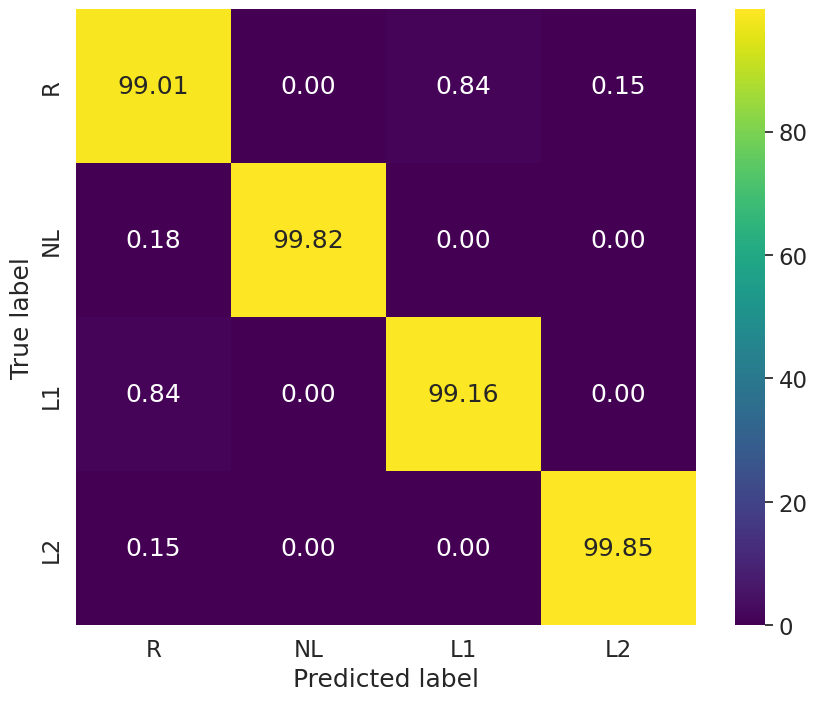

In [ ]:
# Predicting the labels for the test set
y_predicted = np.argmax(model.predict(x_test), axis=1)
y_test_ = np.argmax(y_test, axis=1)

# Generating the confusion matrix
cm = confusion_matrix(y_test_, y_predicted, normalize='true')

# Convert to percentage
cm_percentage = cm * 100

sns.set(font_scale=1.5)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="viridis", xticklabels=['R', 'NL', 'L1', 'L2'], yticklabels=['R', 'NL', 'L1', 'L2'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
#plt.title('Normalized Confusion Matrix (Percentage)')
plt.savefig('ConfusionMatrix4class.svg', format='svg')
plt.show()